## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [5]:
y.shape

(50,)

### Plot X vs. y

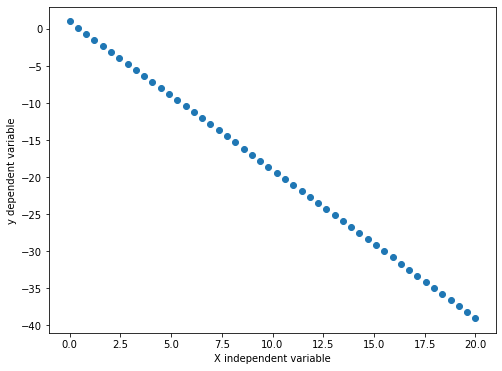

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X independent variable')
plt.ylabel('y dependent variable')
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [ ]:
# Notes:
# gradient then loss check >> cost[-1] - cost[-2] (0.001 for both of them) skip first iteration or initialize inf
# stochastic:
# don't calc gradient and cost check in inner loop
# take absolute value of cost check 
# check last gradient and cost in outer loop 

# NAG >> theta _t (h, j, append) >> check gradient norm or cost converge >> break

In [77]:
def GD_singleVariable(X, y, learning_rate, max_iterations):
    theta_0 = 0
    theta_1 = 0
    i = 0
    loss = []
    y_predict = []                                           
    theta_0_arr = []
    theta_1_arr = []
    while i<max_iterations:
        print(f'****************** Iteration {i} *******************\n')

        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        # step2
        h_x = theta_0 + theta_1*X
        y_predict.append(h_x)
        print(f'h(x):{h_x}\n')
        
        # step3
        error_vector = h_x - y
        print(f'Error Vector:\n{error_vector}\n')
        error_norm = np.linalg.norm(error_vector, 2)
        j = error_norm**2 / (2*len(error_vector))
        loss.append(j)
        print(f'j = {j}\n')
                                              
        # step4                                                  
        d_theta_0 = error_vector.sum()/len(error_vector)
        d_theta_1 = (error_vector@X) /len(error_vector)
        Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector, 2)
        print(f'Gradient Vector :\n {Gradient_Vector}\n')                 
        print(f'Gradient Vector Norm : {Gradient_Vector_Norm}\n')
        if Gradient_Vector_Norm < 0.001:                             
            break
        if i!=0 and (abs(loss[-2] - loss[-1]) < 0.001): 
            break
        
        # step5
        theta_0 = theta_0 - learning_rate*d_theta_0 
        theta_1 = theta_1 - learning_rate*d_theta_1
        print(f'theta_0_new = {theta_0}')
        print(f'theta_1_new = {theta_1}\n')
        i = i + 1

    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} iterations\n')
    print(f'theta_0_opt = {theta_0}')
    print(f'theta_1_opt = {theta_1}\n')
    print(f'Error Vector:\n{error_vector}\n')
    print(f'Cost = {j}\n')
    print(f'h(x) = y_predict :\n{h_x}\n')
    print(f'y_actual :\n{y}\n')
    
    return theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [79]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = GD_singleVariable(X, y, learning_rate=0.0005, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[24.30612245  7.97959184 11.24489796 36.55102041 27.57142857  4.71428571
  0.63265306  1.44897959  2.26530612 29.20408163 33.28571429  3.08163265
 16.95918367 16.14285714 34.10204082 25.12244898  6.34693878 12.06122449
 18.59183673 12.87755102  7.16326531 30.02040816 20.2244898  -1.
 35.73469388 30.83673469 14.51020408 37.36734694  9.6122449  39.
 13.69387755 38.18367347 21.85714286  8.79591837 25.93877551  3.89795918
 21.04081633 31.65306122 15.32653061  5.53061224 22.67346939 34.91836735
 19.40816327 10.42857143 32.46938776 17.7755102  28.3877551  23.48979592
 -0.18367347 26.75510204]

j = 249.88775510204087

Gradient Vector :
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm : 260.08269357432516

theta_0_new = -0.0095
theta_1_new = -0.12969387755102044

***

#### Calculate r2 score

In [80]:
hx = theta_0 + theta_1 * X
hx

array([-24.25450346,  -8.69075194, -11.80350225, -35.92731711,
       -27.36725377,  -5.57800164,  -1.68706376,  -2.46525133,
        -3.24343891, -28.92362892, -32.8145668 ,  -4.02162649,
       -17.25081528, -16.4726277 , -33.59275438, -25.03269104,
        -7.13437679, -12.58168982, -18.80719043, -13.3598774 ,
        -7.91256437, -29.7018165 , -20.36356558,  -0.13068861,
       -35.14912953, -30.48000407, -14.91625255, -36.70550468,
       -10.24712709, -38.26187983, -14.13806497, -37.48369226,
       -21.91994074,  -9.46893952, -25.81087862,  -4.79981406,
       -21.14175316, -31.25819165, -15.69444013,  -6.35618921,
       -22.69812831, -34.37094195, -19.58537801, -11.02531467,
       -32.03637922, -18.02900286, -28.14544134, -23.47631589,
        -0.90887618, -26.58906619])

In [82]:
y_predict[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
r2_score(y,hx)

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [14]:
def loss_epochs_plot(loss):
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(loss)), loss, marker='*')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.grid()
    plt.show()

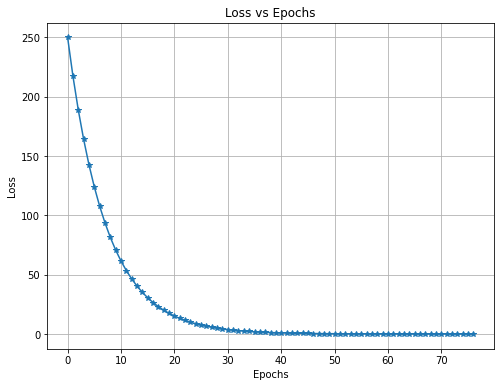

In [84]:
loss_epochs_plot(loss)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [21]:
def loss_theta_plot(loss, theta):
    plt.figure(figsize=(8, 6))
    plt.plot(theta, loss, marker='*')
    plt.xlabel('theta')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

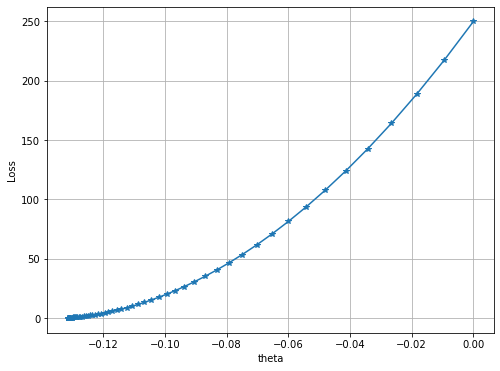

In [85]:
loss_theta_plot(loss, theta_0_arr)

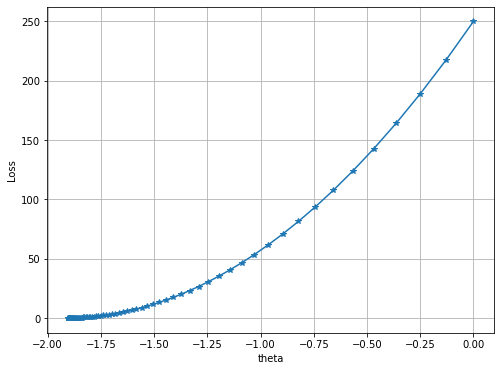

In [86]:
loss_theta_plot(loss, theta_1_arr)

#### Plot all regression lines till converge

In [173]:
y1 = np.array(y_predict).reshape((-1, len(X)))
y1.shape

(1000, 50)

In [87]:
def regression_lines(X, y_predict, y):
    y1 = np.array(y_predict).reshape((-1, len(X)))
    plt.figure(figsize=(8, 6))
    for line in range(y1.shape[0]):
        plt.plot(X, y1[line, :], color = 'red')
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

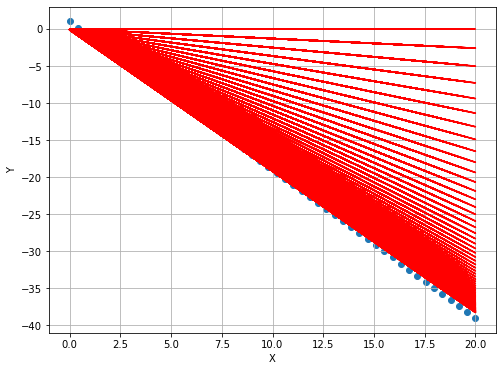

In [88]:
regression_lines(X, y_predict, y)

#### Plot the best regression line

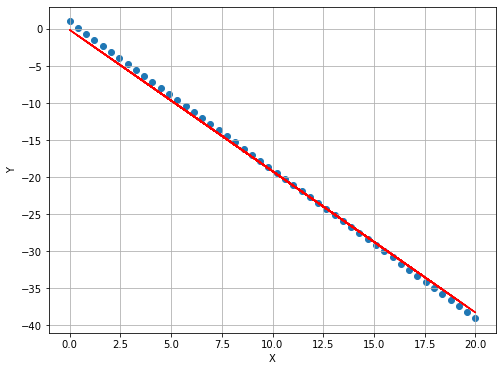

In [89]:
regression_lines(X, y_predict[-1], y)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [90]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = GD_singleVariable(X, y, learning_rate=0.00005, max_iterations=1000)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[24.30612245  7.97959184 11.24489796 36.55102041 27.57142857  4.71428571
  0.63265306  1.44897959  2.26530612 29.20408163 33.28571429  3.08163265
 16.95918367 16.14285714 34.10204082 25.12244898  6.34693878 12.06122449
 18.59183673 12.87755102  7.16326531 30.02040816 20.2244898  -1.
 35.73469388 30.83673469 14.51020408 37.36734694  9.6122449  39.
 13.69387755 38.18367347 21.85714286  8.79591837 25.93877551  3.89795918
 21.04081633 31.65306122 15.32653061  5.53061224 22.67346939 34.91836735
 19.40816327 10.42857143 32.46938776 17.7755102  28.3877551  23.48979592
 -0.18367347 26.75510204]

j = 249.88775510204087

Gradient Vector :
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm : 260.08269357432516

theta_0_new = -0.00095
theta_1_new = -0.012969387755102042

*

In [91]:
hx = theta_0 + theta_1 * X
hx

array([-23.95945311,  -8.58644141, -11.66104375, -35.48921189,
       -27.03405545,  -5.51183907,  -1.66858615,  -2.43723673,
        -3.20588732, -28.57135662, -32.41460955,  -3.9745379 ,
       -17.04159785, -16.27294726, -33.18326013, -24.7281037 ,
        -7.04914024, -12.42969434, -18.57889902, -13.19834492,
        -7.81779083, -29.34000721, -20.11620019,  -0.13128498,
       -34.7205613 , -30.10865779, -14.73564609, -36.25786247,
       -10.12374258, -37.79516364, -13.96699551, -37.02651306,
       -21.65350136,  -9.355092  , -25.49675428,  -4.74318849,
       -20.88485077, -30.87730838, -15.50429668,  -6.28048966,
       -22.42215194, -33.95191072, -19.3475496 , -10.89239317,
       -31.64595896, -17.81024843, -27.80270604, -23.19080253,
        -0.89993556, -26.26540487])

In [92]:
r2_score(y,hx)

0.9965793400861428

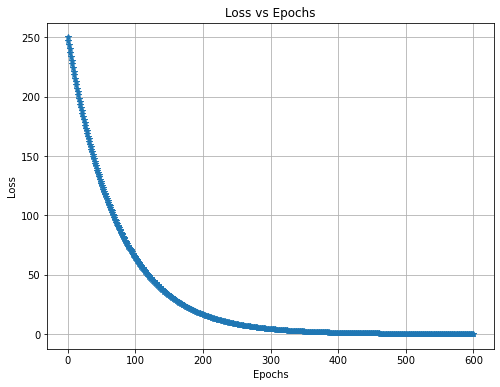

In [93]:
loss_epochs_plot(loss)

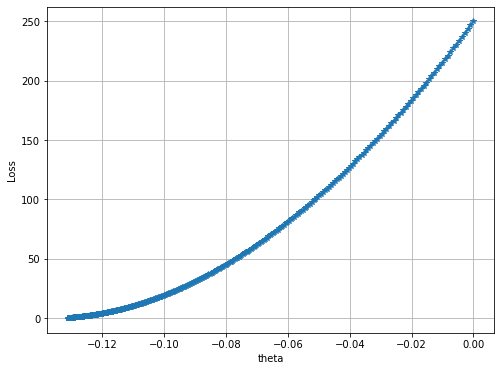

In [94]:
loss_theta_plot(loss, theta_0_arr)

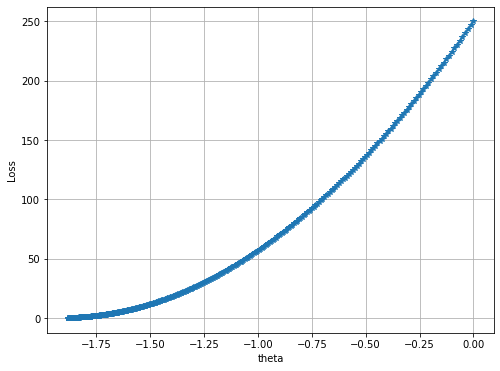

In [95]:
loss_theta_plot(loss, theta_1_arr)

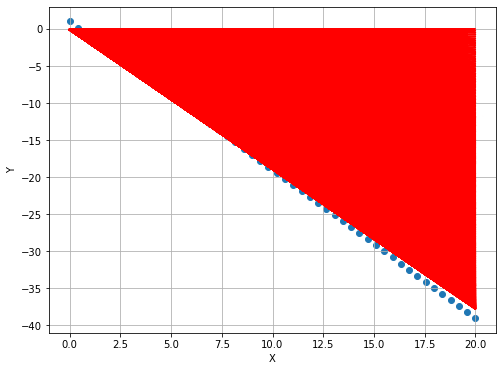

In [96]:
regression_lines(X, y_predict, y)

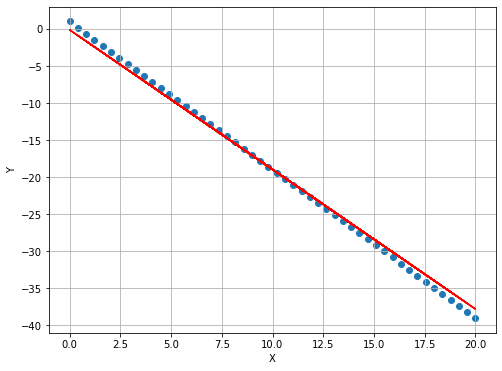

In [97]:
regression_lines(X, y_predict[-1], y)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [98]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = GD_singleVariable(X, y, learning_rate=0.005, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[24.30612245  7.97959184 11.24489796 36.55102041 27.57142857  4.71428571
  0.63265306  1.44897959  2.26530612 29.20408163 33.28571429  3.08163265
 16.95918367 16.14285714 34.10204082 25.12244898  6.34693878 12.06122449
 18.59183673 12.87755102  7.16326531 30.02040816 20.2244898  -1.
 35.73469388 30.83673469 14.51020408 37.36734694  9.6122449  39.
 13.69387755 38.18367347 21.85714286  8.79591837 25.93877551  3.89795918
 21.04081633 31.65306122 15.32653061  5.53061224 22.67346939 34.91836735
 19.40816327 10.42857143 32.46938776 17.7755102  28.3877551  23.48979592
 -0.18367347 26.75510204]

j = 249.88775510204087

Gradient Vector :
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm : 260.08269357432516

theta_0_new = -0.095
theta_1_new = -1.2969387755102042

*****

In [99]:
hx = theta_0 + theta_1 * X
hx

array([-24.36381317,  -8.73050863, -11.85716954, -36.08879158,
       -27.49047408,  -5.60384772,  -1.69552159,  -2.47718682,
        -3.25885204, -29.05380454, -32.96213067,  -4.04051727,
       -17.32882613, -16.5471609 , -33.7437959 , -25.1454784 ,
        -7.16717818, -12.63883477, -18.89215658, -13.42049999,
        -7.9488434 , -29.83546976, -20.45548704,  -0.13219113,
       -35.30712635, -30.61713499, -14.98383045, -36.87045681,
       -10.29383909, -38.43378726, -14.20216522, -37.65212203,
       -22.01881749,  -9.51217386, -25.92714363,  -4.8221825 ,
       -21.23715227, -31.39880022, -15.76549568,  -6.38551295,
       -22.80048272, -34.52546113, -19.67382181, -11.07550431,
       -32.18046544, -18.11049136, -28.27213931, -23.58214795,
        -0.91385636, -26.70880885])

In [100]:
r2_score(y,hx)

0.9976200723230484

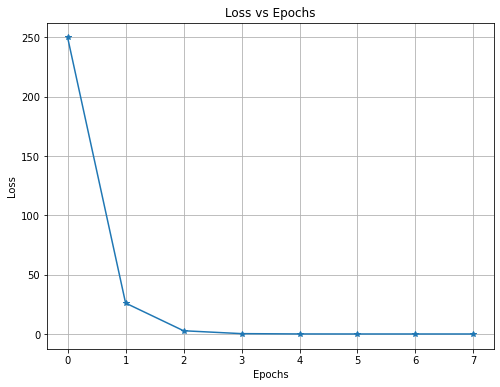

In [101]:
loss_epochs_plot(loss)

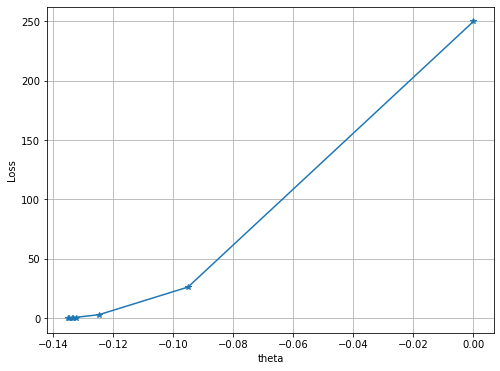

In [102]:
loss_theta_plot(loss, theta_0_arr)

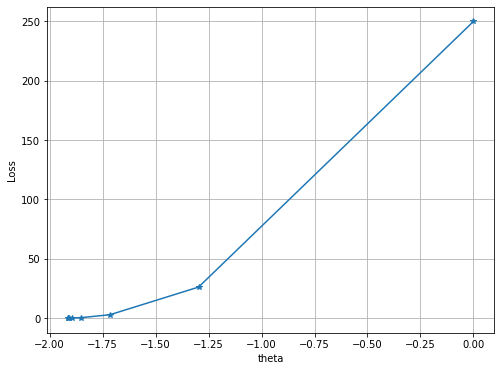

In [103]:
loss_theta_plot(loss, theta_1_arr)

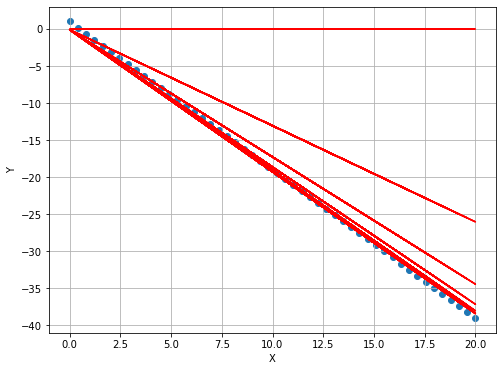

In [104]:
regression_lines(X, y_predict, y)

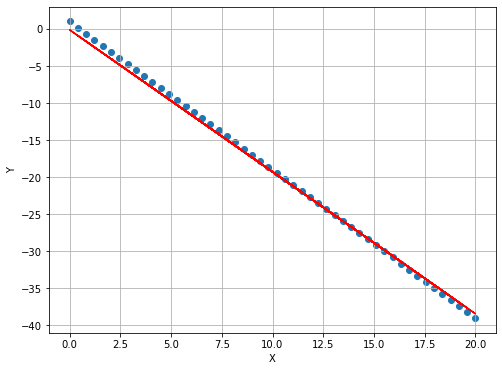

In [105]:
regression_lines(X, y_predict[-1], y)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [ ]:
# don't calc gradient and cost check in inner loop
# take absolute value of cost check 
# check last gradient and cost in outer loop 

In [134]:
def stochastic_GD(X, y, learning_rate, max_iterations):
    # shuffle data
    X = np.array(X).reshape((-1, 1))
    y = np.array(y).reshape((-1, 1))
    all_data = np.concatenate((X, y), axis = 1)
    np.random.shuffle(all_data)
    X = all_data[:, 0]
    y = all_data[:, 1]
    
    # initialization
    theta_0 = 0
    theta_1 = 0
    i = 0
    loss = []
    m = len(X)
    y_predict = []                                           
    theta_0_arr = []
    theta_1_arr = []
    
    grad_epochs = []
    Gradient_Vector= np.zeros((2,1))
    
    for i in range(max_iterations): # No iterations = No epochs
        for k in range(len(X)):
            
            theta_0_arr.append(theta_0)
            theta_1_arr.append(theta_1)

            # step2
            h_x = theta_0 + theta_1*X[k]
            y_predict.append(h_x)

            # step3
            error = h_x - y[k]
            j = error**2 / 2
            loss.append(j)

            # step4                                                  
            d_theta_0 = error
            d_theta_1 = error*X[k]
            
            Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
            Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector, 2)
            grad_epochs.append(Gradient_Vector_Norm)
            
            # step5
            theta_0 = theta_0 - learning_rate*d_theta_0 
            theta_1 = theta_1 - learning_rate*d_theta_1
        
        print(f'****************** Epoch {i} *******************\n')
        print(f'cost = {loss[-1]}\n')
        print(f'Gradient Vector :\n {Gradient_Vector}\n')
        print(f'Gradient Vector Norm : {np.linalg.norm(Gradient_Vector, 2)}\n')
        print(f'theta_0_new = {theta_0_arr[-1]}\n')
        print(f'theta_1_new = {theta_1_arr[-1]}\n')
        
        if i!=0 and abs(grad_epochs[-1]) < 0.001:                          
            break
        if i!=0 and (abs(loss[-1] - loss[-(m+1)]) < 0.001): 
            break

    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} epochs\n')
    print(f'theta_0_opt = {theta_0_arr[-1]}')
    print(f'theta_1_opt = {theta_1_arr[-1]}\n')
    print(f'Cost = {loss[-1]}\n')
    
    return theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1

In [135]:
# cost each iteration not each epochs
# each epoch >> cost convergence check >> cost[-1], cost[-(m+1)], in mini-batch: m>> number of batches

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [167]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = stochastic_GD(X, y, learning_rate=0.0005, max_iterations=300)

****************** Epoch 0 *******************

cost = 0.023356958534795046

Gradient Vector :
 [[0.21613403]
 [2.0290133 ]]

Gradient Vector Norm : 2.0404923178314736

theta_0_new = -0.12332060810685484

theta_1_new = -1.857318962919514

****************** Epoch 1 *******************

cost = 0.038126918208939015

Gradient Vector :
 [[-0.27614097]
 [-2.59234382]]

Gradient Vector Norm : 2.607009841030452

theta_0_new = -0.11982046187601268

theta_1_new = -1.9101297934698782

****************** Epoch 2 *******************

cost = 0.04134322087992873

Gradient Vector :
 [[-0.2875525 ]
 [-2.69947247]]

Gradient Vector Norm : 2.7147445693973826

theta_0_new = -0.11270815604335993

theta_1_new = -1.9121029847434465

****************** Epoch 3 *******************

cost = 0.04091368094850005

Gradient Vector :
 [[-0.28605482]
 [-2.68541263]]

Gradient Vector Norm : 2.7006051794755583

theta_0_new = -0.1055439946784984

theta_1_new = -1.9127065882594645

****************** Training Report ****

In [168]:
r2_score(y,hx)

0.9976200723230484

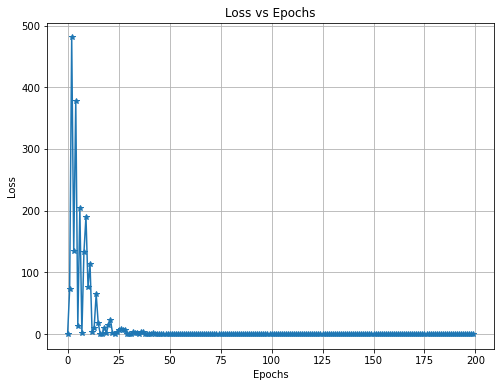

In [169]:
loss_epochs_plot(loss)

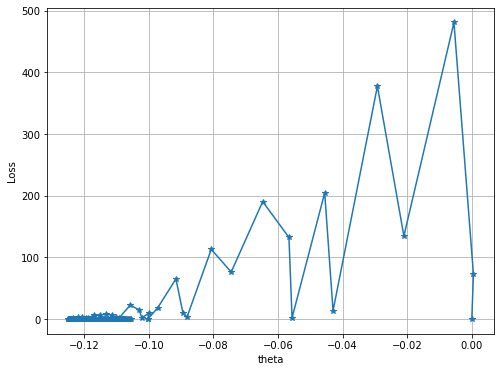

In [170]:
loss_theta_plot(loss, theta_0_arr)

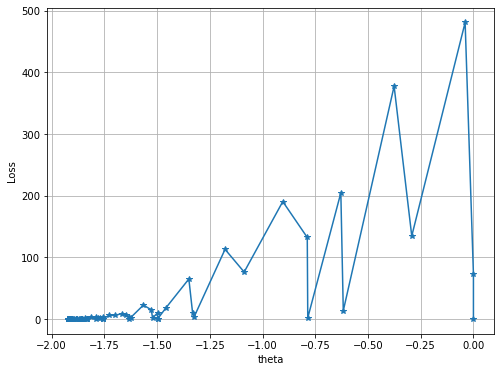

In [171]:
loss_theta_plot(loss, theta_1_arr)

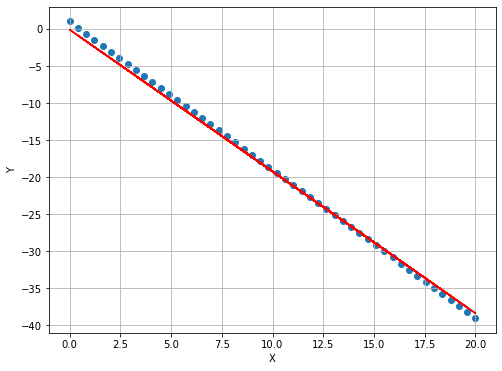

In [172]:
y5 = theta_0_arr[-1] + theta_1_arr[-1]*X
regression_lines(X, y5, y)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [154]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = stochastic_GD(X, y, learning_rate=0.0001, max_iterations=300)

****************** Epoch 0 *******************

cost = 10.175894461483434

Gradient Vector :
 [[ 4.5112957 ]
 [23.93748741]]

Gradient Vector Norm : 24.358881177307055

theta_0_new = -0.06909696186374664

theta_1_new = -0.9483106130963647

****************** Epoch 1 *******************

cost = 1.8584928868050457

Gradient Vector :
 [[ 1.92794859]
 [10.2299313 ]]

Gradient Vector Norm : 10.410018264837596

theta_0_new = -0.10366451529143943

theta_1_new = -1.4286575297691668

****************** Epoch 2 *******************

cost = 0.1965742397088593

Gradient Vector :
 [[0.62701553]
 [3.3270212 ]]

Gradient Vector Norm : 3.385589835931015

theta_0_new = -0.12035298324921821

theta_1_new = -1.670688241049024

****************** Epoch 3 *******************

cost = 0.0003890646695750546

Gradient Vector :
 [[-0.02789497]
 [-0.14801413]]

Gradient Vector Norm : 0.15061975517728562

theta_0_new = -0.1280356941740983

theta_1_new = -1.7926657865569122

****************** Epoch 4 **************

In [155]:
r2_score(y,hx)

0.9976200723230484

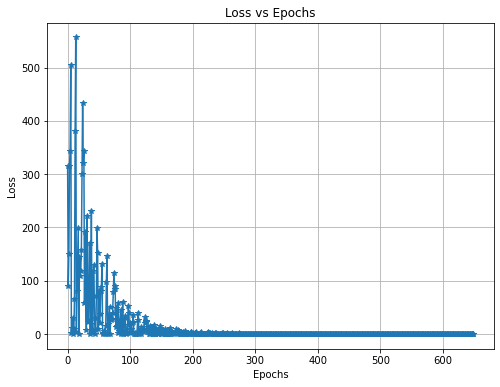

In [156]:
loss_epochs_plot(loss)

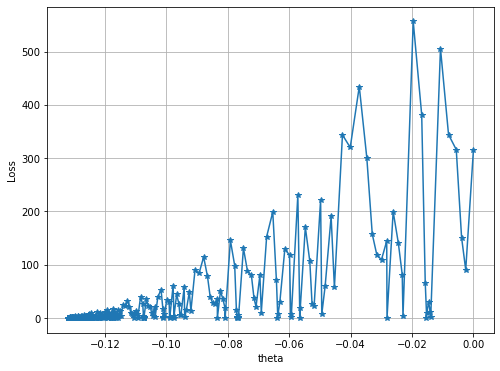

In [157]:
loss_theta_plot(loss, theta_0_arr)

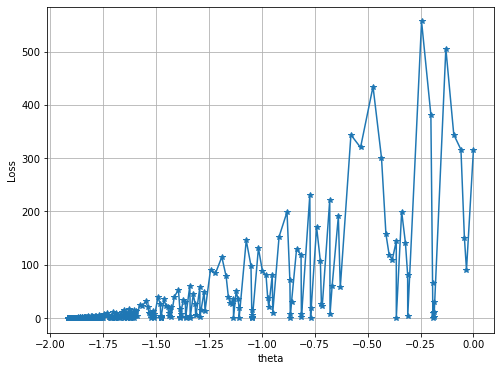

In [158]:
loss_theta_plot(loss, theta_1_arr)

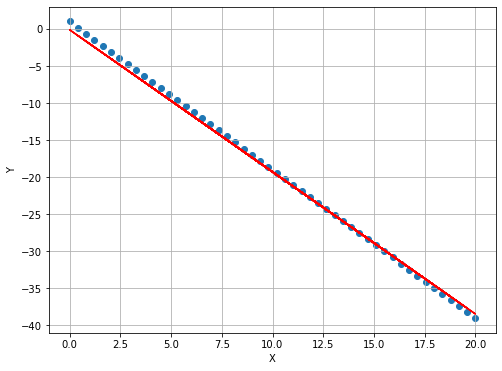

In [160]:
y_new = theta_0_arr[-1] + theta_1_arr[-1]*X
regression_lines(X, y_new, y)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [173]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = stochastic_GD(X, y, learning_rate=0.00007, max_iterations=300)

****************** Epoch 0 *******************

cost = 13.45632379296342

Gradient Vector :
 [[ 5.18774012]
 [25.40933938]]

Gradient Vector Norm : 25.933514518121903

theta_0_new = -0.05227875897478116

theta_1_new = -0.7259961448879837

****************** Epoch 1 *******************

cost = 4.326620705664426

Gradient Vector :
 [[ 2.94163924]
 [14.40802892]]

Gradient Vector Norm : 14.705255486024846

theta_0_new = -0.08468141720927887

theta_1_new = -1.1779595327286279

****************** Epoch 2 *******************

cost = 1.200438392547329

Gradient Vector :
 [[1.54947629]
 [7.58927164]]

Gradient Vector Norm : 7.745832483277852

theta_0_new = -0.1043804110152064

theta_1_new = -1.4581709227638335

****************** Epoch 3 *******************

cost = 0.235770731906474

Gradient Vector :
 [[0.68668877]
 [3.36337356]]

Gradient Vector Norm : 3.432757367572512

theta_0_new = -0.11620446145474132

theta_1_new = -1.631909299028604

****************** Epoch 4 *******************

cost

In [174]:
r2_score(y,hx)

0.9976200723230484

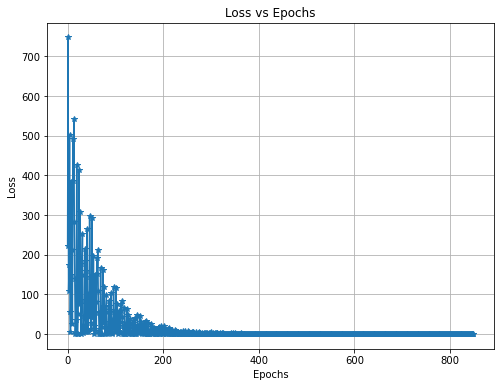

In [175]:
loss_epochs_plot(loss)

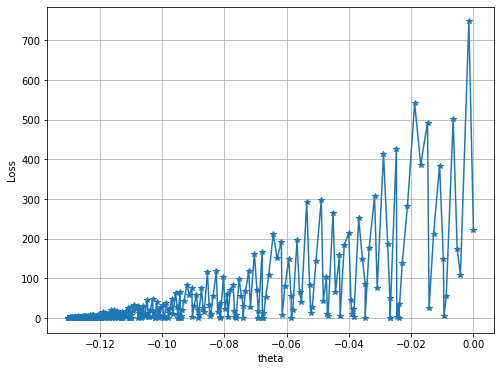

In [176]:
loss_theta_plot(loss, theta_0_arr)

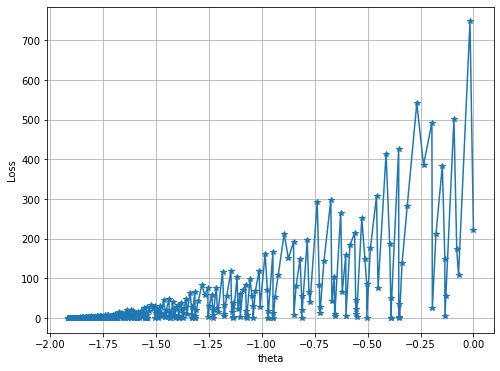

In [177]:
loss_theta_plot(loss, theta_1_arr)

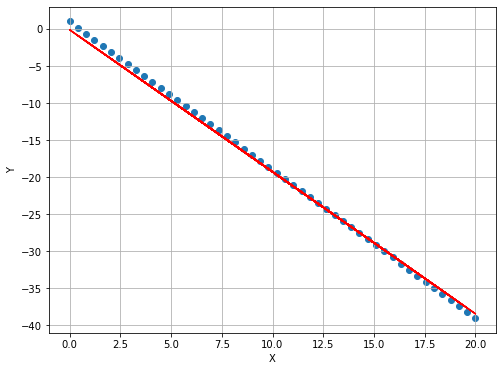

In [178]:
y_new = theta_0_arr[-1] + theta_1_arr[-1]*X
regression_lines(X, y_new, y)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [227]:
def mini_batch_GD(X, y, batch_size, learning_rate, max_iterations):
    # shuffle data
    X = np.array(X).reshape((-1, 1))
    y = np.array(y).reshape((-1, 1))
    all_data = np.concatenate((X, y), axis = 1)
    np.random.shuffle(all_data)
    X = all_data[:, 0]
    y = all_data[:, 1]
    
    # initialization
    theta_0 = 0
    theta_1 = 0
#     m = len(X)
    loss = []
    y_predict = []                                           
    theta_0_arr = []
    theta_1_arr = []
    grad_epochs = []
    Gradient_Vector= np.zeros((2,1))
    
    number_of_batches = len(X)//batch_size
    
    for i in range(max_iterations): 
        for k in range(number_of_batches):

            theta_0_arr.append(theta_0)
            theta_1_arr.append(theta_1)

            # step2
            h_x = theta_0 + theta_1*X[k*batch_size:(k+1)*batch_size]
#             y_predict.append(h_x)

            # step3
            error = h_x - y[k*batch_size:(k+1)*batch_size]
            error_norm = np.linalg.norm(error, 2)
            j = (error_norm**2) / (2*len(error))
            loss.append(j)

            # step4                                                  
            d_theta_0 = np.sum(error)/len(error)
            d_theta_1 = error@X[k*batch_size:(k+1)*batch_size] / len(error)

            Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
            Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector, 2)
            grad_epochs.append(Gradient_Vector_Norm)

            # step5
            theta_0 = theta_0 - learning_rate*d_theta_0 
            theta_1 = theta_1 - learning_rate*d_theta_1

        print(f'****************** Epoch {i} *******************\n')
        print(f'cost = {loss[-1]}\n')
        print(f'Gradient Vector :\n {Gradient_Vector}\n')
        print(f'Gradient Vector Norm : {np.linalg.norm(Gradient_Vector, 2)}\n')
        print(f'theta_0_new = {theta_0_arr[-1]}\n')
        print(f'theta_1_new = {theta_1_arr[-1]}\n')

        print(loss)
        
        if abs(grad_epochs[-1]) < 0.001:                          
            break
        if i!=0 and (abs(loss[-1] - loss[-(number_of_batches+1)]) < 0.001): 
            break

    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} epochs\n')
    print(f'theta_0_opt = {theta_0_arr[-1]}')
    print(f'theta_1_opt = {theta_1_arr[-1]}\n')
    print(f'Cost = {loss[-1]}\n')
    
    return theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [229]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = mini_batch_GD(X, y, batch_size=5, learning_rate=0.0005 , max_iterations=3000)

****************** Epoch 0 *******************

cost = 53.5714378206888

Gradient Vector :
 [[  8.31731342]
 [106.97752664]]

Gradient Vector Norm : 107.30036770095991

theta_0_new = -0.06687004457193535

theta_1_new = -0.9155070992282927

[45.008121615993325, 233.37451853124122, 280.57073712092176, 298.1352687313573, 139.5900158961582, 77.19010072299353, 127.46895367453092, 112.23394446664466, 85.39851074689548, 53.5714378206888]
****************** Epoch 1 *******************

cost = 13.005619519712237

Gradient Vector :
 [[ 3.90070577]
 [52.42079932]]

Gradient Vector Norm : 52.56572749336286

theta_0_new = -0.10343911793132898

theta_1_new = -1.4216908026967752

[45.008121615993325, 233.37451853124122, 280.57073712092176, 298.1352687313573, 139.5900158961582, 77.19010072299353, 127.46895367453092, 112.23394446664466, 85.39851074689548, 53.5714378206888, 9.689448400923057, 56.61818782894203, 69.33918197909064, 74.1202290780823, 34.0391707547033, 18.79216038817132, 31.719844208004883,

In [230]:
r2_score(y,hx)

0.9976200723230484

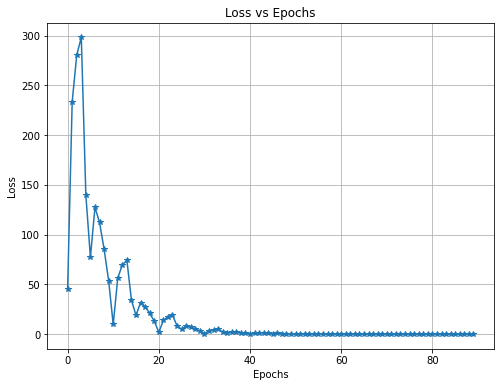

In [231]:
loss_epochs_plot(loss)

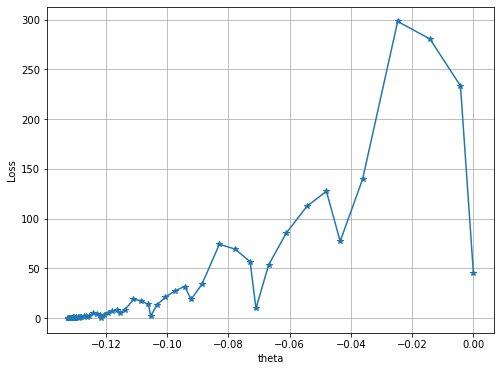

In [232]:
loss_theta_plot(loss, theta_0_arr)

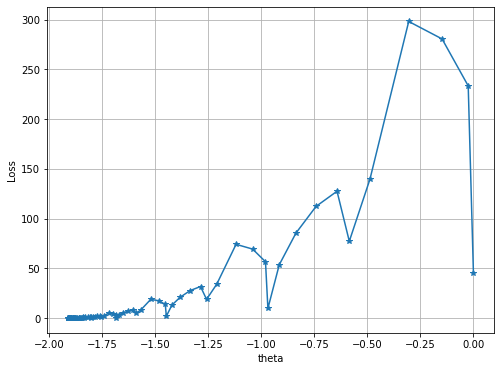

In [233]:
loss_theta_plot(loss, theta_1_arr)

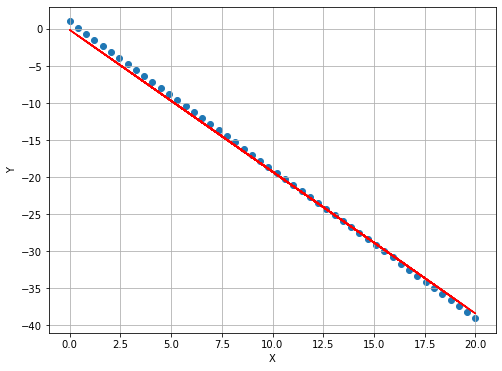

In [234]:
y_new = theta_0_arr[-1] + theta_1_arr[-1]*X
regression_lines(X, y_new, y)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [235]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = mini_batch_GD(X, y, batch_size=10, learning_rate=0.0005 , max_iterations=300)

****************** Epoch 0 *******************

cost = 65.65900644666866

Gradient Vector :
 [[ 7.77816885]
 [94.22285568]]

Gradient Vector Norm : 94.54335748086288

theta_0_new = -0.037508032290274565

theta_1_new = -0.5206569623081628

[233.56788837984172, 295.8308718038635, 186.77160448847945, 186.19980749175448, 65.65900644666866]
****************** Epoch 1 *******************

cost = 32.33485313391496

Gradient Vector :
 [[ 5.28338172]
 [65.97239619]]

Gradient Vector Norm : 66.1836171680255

theta_0_new = -0.06766319065255097

theta_1_new = -0.9342424632820928

[233.56788837984172, 295.8308718038635, 186.77160448847945, 186.19980749175448, 65.65900644666866, 115.3297152428834, 147.20013323417902, 92.3350010561978, 92.41292274541972, 32.33485313391496]
****************** Epoch 2 *******************

cost = 15.936883643759401

Gradient Vector :
 [[ 3.52833612]
 [46.09745123]]

Gradient Vector Norm : 46.23228488029924

theta_0_new = -0.08866193812196974

theta_1_new = -1.2252297778

In [236]:
r2_score(y,hx)

0.9976200723230484

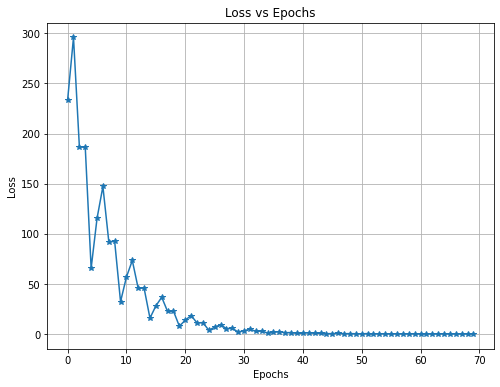

In [237]:
loss_epochs_plot(loss)

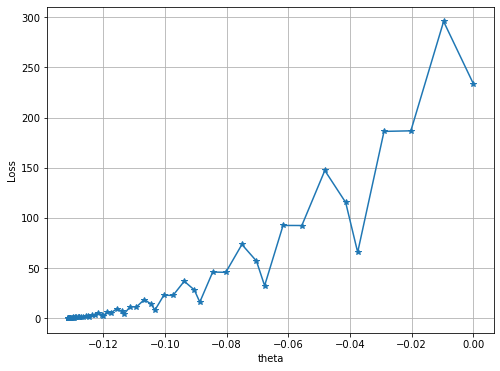

In [238]:
loss_theta_plot(loss, theta_0_arr)

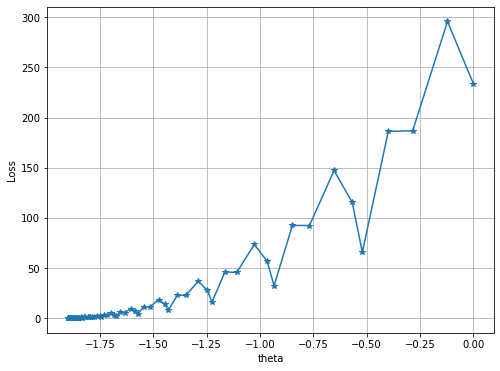

In [239]:
loss_theta_plot(loss, theta_1_arr)

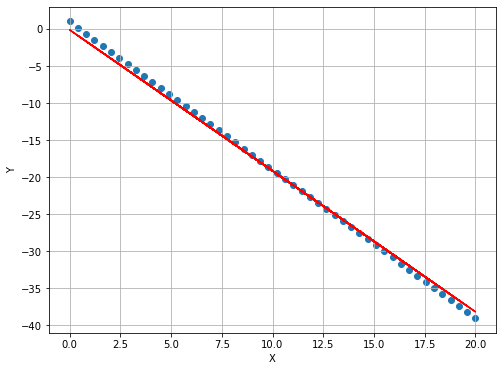

In [240]:
y_new = theta_0_arr[-1] + theta_1_arr[-1]*X
regression_lines(X, y_new, y)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [241]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = mini_batch_GD(X, y, batch_size=20, learning_rate=0.0005 , max_iterations=300)

****************** Epoch 0 *******************

cost = 216.6101833785495

Gradient Vector :
 [[ 16.95461982]
 [237.90047808]]

Gradient Vector Norm : 238.5038712604073

theta_0_new = -0.008520408163265308

theta_1_new = -0.10710995418575595

[205.69950020824658, 216.6101833785495]
****************** Epoch 1 *******************

cost = 168.58769290492427

Gradient Vector :
 [[ 14.91384001]
 [209.85391469]]

Gradient Vector Norm : 210.38319356666102

theta_0_new = -0.024490049772563003

theta_1_new = -0.3204770469633311

[205.69950020824658, 216.6101833785495, 159.8701310312217, 168.58769290492427]
****************** Epoch 2 *******************

cost = 131.2333123393911

Gradient Vector :
 [[ 13.11428279]
 [185.12231972]]

Gradient Vector Norm : 185.58625398994036

theta_0_new = -0.03853274558174033

theta_1_new = -0.5086280399970302

[205.69950020824658, 216.6101833785495, 159.8701310312217, 168.58769290492427, 124.2480619572189, 131.2333123393911]
****************** Epoch 3 ***********

In [242]:
r2_score(y,hx)

0.9976200723230484

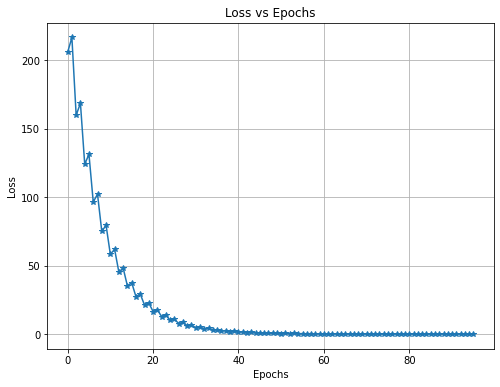

In [243]:
loss_epochs_plot(loss)

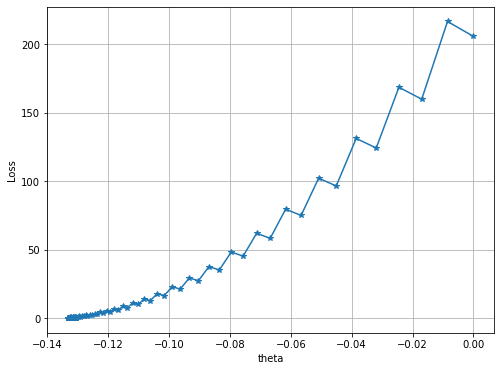

In [244]:
loss_theta_plot(loss, theta_0_arr)

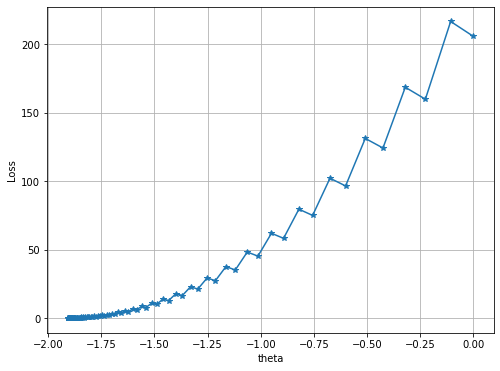

In [245]:
loss_theta_plot(loss, theta_1_arr)

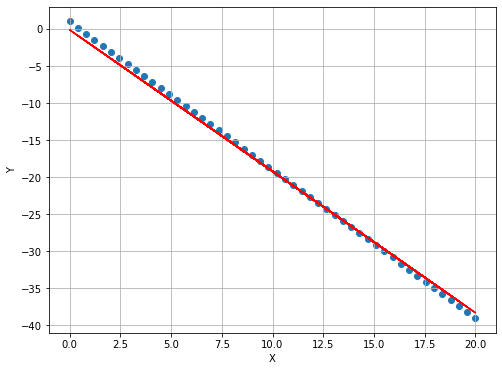

In [246]:
y_new = theta_0_arr[-1] + theta_1_arr[-1]*X
regression_lines(X, y_new, y)